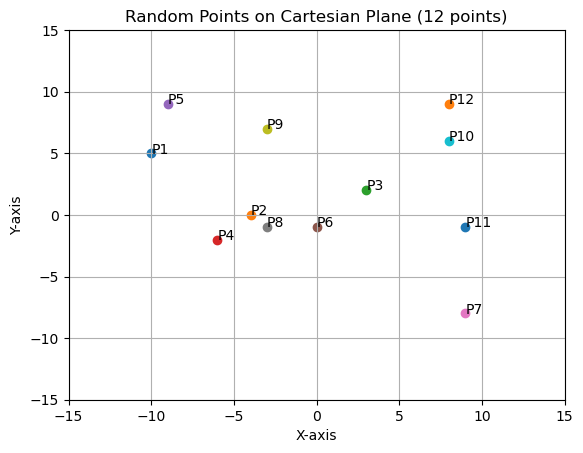

In [222]:
#Following code generetes random points on a 2D plane. These points will be our Tags.
#In this code we can set how many tags we want and the size of the plane.

import matplotlib.pyplot as plt
import random

# Generate random points
num_points = 12  # Change this value to generate a different number of points

# generating random x and y coordinates of the tags with values between-10 to 10
x_coords = [random.randint(-10, 10) for _ in range(num_points)]
y_coords = [random.randint(-10, 10) for _ in range(num_points)]

# assigning labels to points as P1, P2... and so on
point_labels = [f"P{i+1}" for i in range(num_points)]

# for Figure plotting
fig, ax = plt.subplots()
# Set the x and y limits of the axes
ax.set_xlim([-15, 15])
ax.set_ylim([-15, 15])

# Plot the points on the axis
# ax.scatter(x_coords, y_coords)
for i in range(num_points):
    ax.scatter(x_coords[i], y_coords[i])
    ax.annotate(point_labels[i], (x_coords[i], y_coords[i]))

# Add gridlines
ax.grid(True)

# Set the title and axis labels
ax.set_title(f"Random Points on Cartesian Plane ({num_points} points)")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")


# Show the plot
plt.show()

In [224]:
# Code for calculating distance maxtrix. It will store distance between each pair of tags.

import pandas as pd
from scipy.spatial.distance import pdist, squareform
from IPython.display import display

points = [(x_coords[i], y_coords[i]) for i in range(num_points)]
point_labels = [f"P{i+1}" for i in range(num_points)]

# Calculate pairwise distances
distances = pdist(points)

# Convert the distances to a square matrix
dist_matrix = squareform(distances)

# Create a pandas DataFrame with the distances
df = pd.DataFrame(dist_matrix, columns=point_labels, index=point_labels)

# Print the DataFrame
display(df)


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
P1,0.000000,7.810250,13.341664,8.062258,4.123106,11.661904,23.021729,9.219544,7.280110,18.027756,19.924859,18.439089
P2,7.810250,0.000000,7.280110,2.828427,10.295630,4.123106,15.264338,1.414214,7.071068,13.416408,13.038405,15.000000
P3,13.341664,7.280110,0.000000,9.848858,13.892444,4.242641,11.661904,6.708204,7.810250,6.403124,6.708204,8.602325
P4,8.062258,2.828427,9.848858,0.000000,11.401754,6.082763,16.155494,3.162278,9.486833,16.124515,15.033296,17.804494
P5,4.123106,10.295630,13.892444,11.401754,0.000000,13.453624,24.758837,11.661904,6.324555,17.262677,20.591260,17.000000
P6,11.661904,4.123106,4.242641,6.082763,13.453624,0.000000,11.401754,3.000000,8.544004,10.630146,9.000000,12.806248
P7,23.021729,15.264338,11.661904,16.155494,24.758837,11.401754,0.000000,13.892444,19.209373,14.035669,7.000000,17.029386
P8,9.219544,1.414214,6.708204,3.162278,11.661904,3.000000,13.892444,0.000000,8.000000,13.038405,12.000000,14.866069
P9,7.280110,7.071068,7.810250,9.486833,6.324555,8.544004,19.209373,8.000000,0.000000,11.045361,14.422205,11.180340
P10,18.027756,13.416408,6.403124,16.124515,17.262677,10.630146,14.035669,13.038405,11.045361,0.000000,7.071068,3.000000


In [226]:
#code for saving the distance matrix.
#df.to_csv('dist_table.csv');

In [227]:

# give a value of radius till what a tag can communicate.
radius = 7.08

# defining neighbor table according to the defined radius.
# value 1 in the table means there is an transmission as well as interference link is present between that pair.
# a random large value of 100000 for absence of links between pairs. 0 means self link.

neighbor_table = df
neighbor_table = neighbor_table.applymap(lambda x: 100000 if x > radius else 1)

# filling 0 for self links.
for i in range(num_points):
    neighbor_table.at[f"P{i+1}", f"P{i+1}"] = 0
    
neighbor_table

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
P1,0,100000,100000,100000,1,100000,100000,100000,100000,100000,100000,100000
P2,100000,0,100000,1,100000,1,100000,1,1,100000,100000,100000
P3,100000,100000,0,100000,100000,1,100000,1,100000,1,1,100000
P4,100000,1,100000,0,100000,1,100000,1,100000,100000,100000,100000
P5,1,100000,100000,100000,0,100000,100000,100000,1,100000,100000,100000
P6,100000,1,1,1,100000,0,100000,1,100000,100000,100000,100000
P7,100000,100000,100000,100000,100000,100000,0,100000,100000,100000,1,100000
P8,100000,1,1,1,100000,1,100000,0,100000,100000,100000,100000
P9,100000,1,100000,100000,1,100000,100000,100000,0,100000,100000,100000
P10,100000,100000,1,100000,100000,100000,100000,100000,100000,0,1,1


In [228]:
#code to save the neighbor table
#neighbor_table.to_csv('n_table.csv');

In [229]:
# following code is for calculating shortest distance between each pair of tags.
# we are not usign this for defining constraints but will be used later for generating routing table.
# can ignore this code and resulting table, as of now.

import pandas as pd
import numpy as np

# Define a function to apply Floyd-Warshall algorithm on the adjacency matrix
def floyd_warshall(adj_matrix):
    # Initialize the distances matrix with the same values as the adjacency matrix
    num_nodes = len(adj_matrix)
    dist = adj_matrix.copy()

    # Iterate over all intermediate nodes
    for k in range(num_nodes):
        # Iterate over all pairs of nodes
        for i in range(num_nodes):
            for j in range(num_nodes):
                # If the path through node k is shorter than the current path, update the distance
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist

# Create a sample adjacency matrix DataFrame
adj_matrix = neighbor_table

# Apply Floyd-Warshall algorithm to find the shortest path distances between each pair of nodes
shortest_path_distances = floyd_warshall(adj_matrix.values)

# Convert the resulting 2D numpy array to a DataFrame with row and column labels representing the nodes
shortest_path = pd.DataFrame(shortest_path_distances, index=adj_matrix.index, columns=adj_matrix.columns)

# Print the resulting shortest path DataFrame
display(shortest_path)


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12
P1,0,3,5,4,1,4,7,4,2,6,6,7
P2,3,0,2,1,2,1,4,1,1,3,3,4
P3,5,2,0,2,4,1,2,1,3,1,1,2
P4,4,1,2,0,3,1,4,1,2,3,3,4
P5,1,2,4,3,0,3,6,3,1,5,5,6
P6,4,1,1,1,3,0,3,1,2,2,2,3
P7,7,4,2,4,6,3,0,3,5,2,1,3
P8,4,1,1,1,3,1,3,0,2,2,2,3
P9,2,1,3,2,1,2,5,2,0,4,4,5
P10,6,3,1,3,5,2,2,2,4,0,1,1


In [242]:
# defining vector X will which will store which tag is chosen for sending messages.
# X[0] is by default 0 , for making it 1-based indexing.

# manually setting the xi values for some tags.

X = [0 for i in range(num_points + 1)]
X[2] = X[3] = X[6] = X[9] = 1
X

[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [243]:
# defining vector M which tells which message is selected for transmission for a particular tag. 
# for example M[1] = 5 means 5th message of tag 1 is selected.
M = [0 for i in range(num_points + 1)]
M[2] = M[3] = M[6] = M[9] = 1
M

[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [244]:
# defining a dictionary for storing ci values(as mentioned in Paper) of every message, Key of the dictionary is tag's number.

C = {}

for i in range(num_points + 1):
    key = i
    values = []
    C[key] = values


# manually setting the values as of now.
C[2].append(1)
C[3].append(1)
C[6].append(1)
C[9].append(1)
C[9].append(0)


C


{0: [],
 1: [],
 2: [1],
 3: [1],
 4: [],
 5: [],
 6: [1],
 7: [],
 8: [],
 9: [1, 0],
 10: [],
 11: [],
 12: []}

In [245]:
# function for difining C2 constraints
def define_c2(x, c):
    constraint = []
    n = len(x)
    
    for i in range(n):
        str = []
        if(i == 0):
            continue
        if(len(c[i]) == 0):
            constraint.append(f'x\u0305{i}')
            continue
        
        str.append(f'x{i}(')
        for j in range(len(c[i])):
            str.append(f'c{i}{j + 1}')
            for k in range(len(c[i])):
                if(k != j):
                    str.append(f'c\u0305{i}{k + 1}')
            
            if(j != len(c[i]) - 1):
                str.append(f' + ')
        
        
        str.append(f')')
        str.append(f'+')
        str.append(f'x\u0305{i}')
        
        for j in range(len(c[i])):
            str.append(f'c\u0305{i}{j + 1}')
            
        constraint.append(''.join(str))
        
    return constraint
 

    
    
# running the function.
print(define_c2(X, C))

['x̅1', 'x2(c21)+x̅2c̅21', 'x3(c31)+x̅3c̅31', 'x̅4', 'x̅5', 'x6(c61)+x̅6c̅61', 'x̅7', 'x̅8', 'x9(c91c̅92 + c92c̅91)+x̅9c̅91c̅92', 'x̅10', 'x̅11', 'x̅12']


In [246]:
# defining vector dest which stores destination for each tag.
# Assuming destination is set for all tags using the Routing table.

dest = [0 for i in range(num_points + 1)]

dest[2] = 6
dest[3] = 10
dest[6] = 3
dest[9] = 2
dest

[0, 0, 6, 10, 0, 0, 3, 0, 0, 2, 0, 0, 0]

In [247]:

def define_c3(x, m, c, dst, neighbor):
    
    # vector to store all constraints
    constraint = []
    
    for i in range(len(x)):
        str = [] # for storing constraint of a single tag
        
        # for every active tags we will see interfering tags in neighbor table and append them to the constraints.
        if(x[i] == 1):
            str.append(f'g(c{i}{m[i]}, ')
            ind = dst[i]
            for j in range(num_points):
                if(neighbor[f'P{ind}'][f'P{j + 1}'] == 1 and j != i - 1):
                    str.append(f'x{j + 1} ')
                    str.append('+ ')
             
            if(str[-1] == '+ ' ): # just to remove extra + at the end
                str = str[: -1]
                
            str.append(f')')
            constraint.append(''.join(str))
                      
    return constraint


# running the function
print(define_c3(X, M, C, dest, neighbor_table))

['g(c21, x3 + x4 + x8 )', 'g(c31, x11 + x12 )', 'g(c61, x8 + x10 + x11 )', 'g(c91, x4 + x6 + x8 )']
